# Clustering_Practical

##
### 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

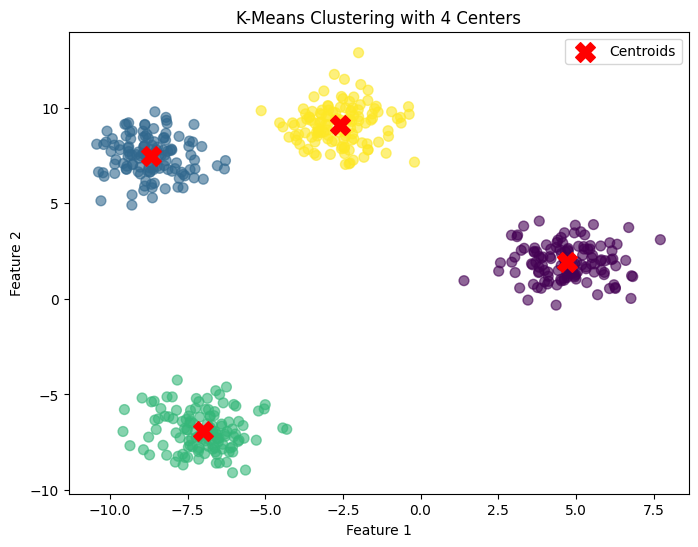

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8,6))

# Plot data points colored by cluster assignment
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##
### 22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Apply Agglomerative Clustering with 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_pred = agg_cluster.fit_predict(X)

# Step 3: Display the first 10 predicted cluster labels
print("First 10 predicted labels:", y_pred[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


##
### 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

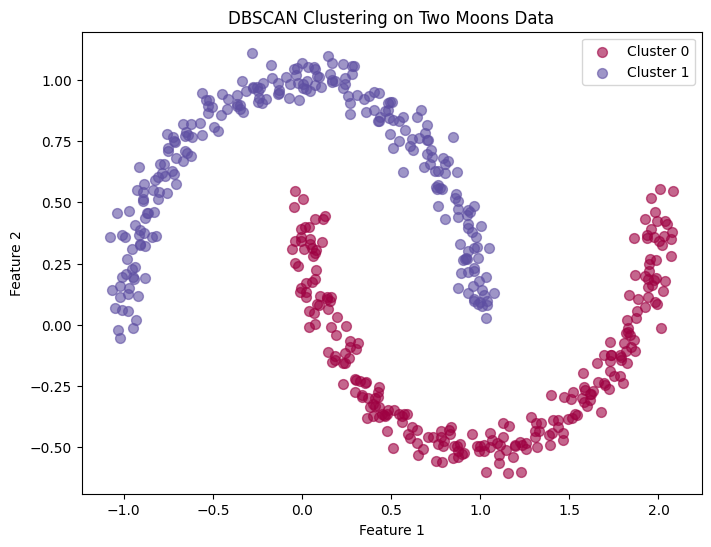

In [3]:
# Import libraries
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Generate synthetic two moons data
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_db = dbscan.fit_predict(X)

# Step 3: Plot the clusters and outliers
plt.figure(figsize=(8,6))

# Identify core points, clusters, and outliers
core_samples_mask = np.zeros_like(y_db, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plot clusters
unique_labels = set(y_db)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Outliers are labeled as -1
        col = [0, 0, 0, 1]  # Black color for outliers
    class_member_mask = (y_db == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                c=[col], s=50, alpha=0.6, label=f'Cluster {k}' if k != -1 else 'Outliers')

plt.title('DBSCAN Clustering on Two Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##
### 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

In [4]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler


# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering (let's use 3 clusters)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 4: Print the size of each cluster
unique, counts = np.unique(y_kmeans, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


##
### 25.  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

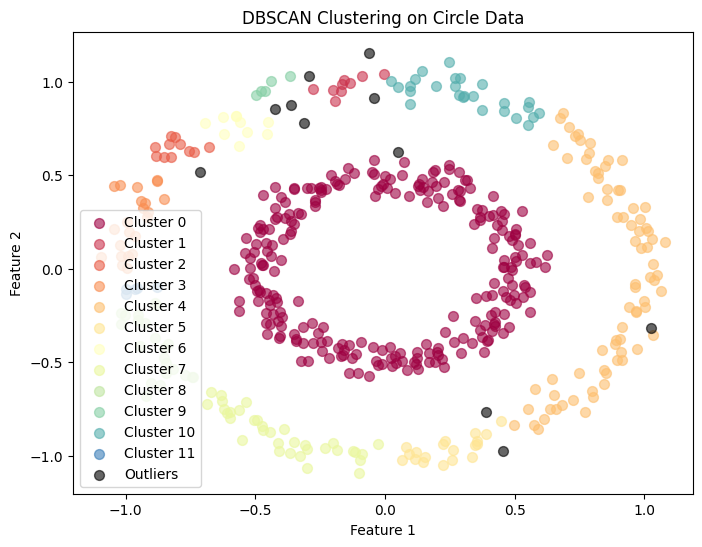

In [5]:
# Import libraries
from sklearn.datasets import make_circles

# Step 1: Generate synthetic circle data
X, y_true = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_db = dbscan.fit_predict(X)

# Step 3: Plot clusters
plt.figure(figsize=(8,6))
unique_labels = set(y_db)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for outliers
        col = [0, 0, 0, 1]
    class_member_mask = (y_db == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                c=[col], s=50, alpha=0.6, label=f'Cluster {k}' if k != -1 else 'Outliers')

plt.title('DBSCAN Clustering on Circle Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##
### 26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [6]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Step 4: Output cluster centroids
print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


##
### 27.  Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

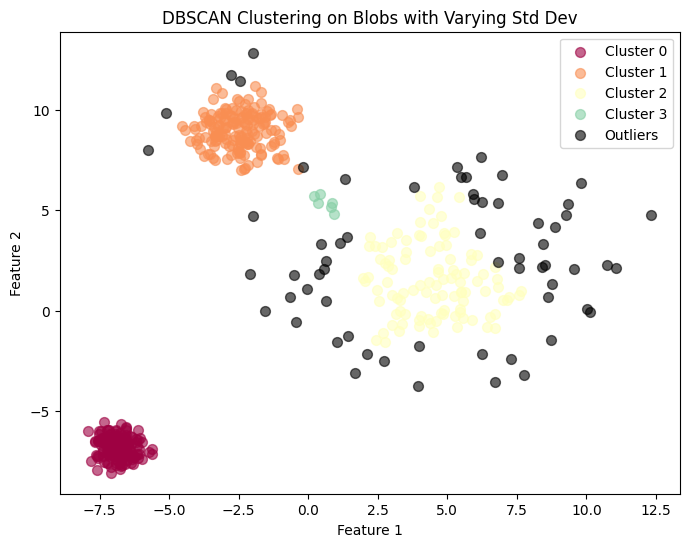

In [7]:
# Step 1: Generate synthetic data with varying standard deviations
X, y_true = make_blobs(n_samples=500,
                       centers=3,
                       cluster_std=[1.0, 2.5, 0.5],  # Different spread for each cluster
                       random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # eps chosen to capture variable spread
y_db = dbscan.fit_predict(X)

# Step 3: Plot clusters
plt.figure(figsize=(8,6))
unique_labels = set(y_db)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for outliers
    class_member_mask = (y_db == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                c=[col], s=50, alpha=0.6, label=f'Cluster {k}' if k != -1 else 'Outliers')

plt.title('DBSCAN Clustering on Blobs with Varying Std Dev')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##
### 28.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

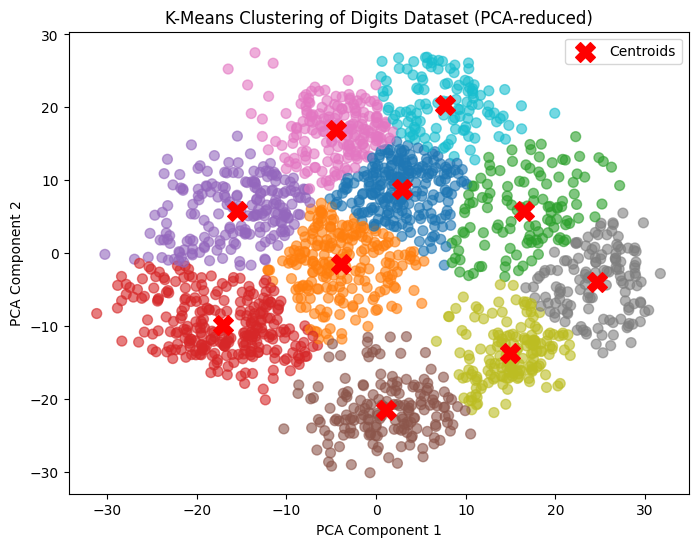

In [8]:
# Import libraries
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y_true = digits.target

# Step 2: Reduce data to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Step 4: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='tab10', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering of Digits Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


##
### 29.  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

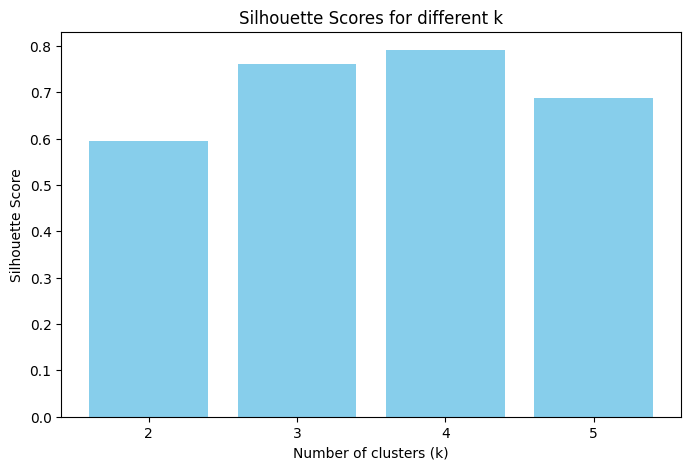

In [10]:
# Import libraries
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Compute Silhouette Scores for k = 2 to 5
k_values = range(2, 6)
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    score = silhouette_score(X, y_kmeans)
    sil_scores.append(score)

# Step 3: Plot Silhouette Scores as a bar chart
plt.figure(figsize=(8,5))
plt.bar(k_values, sil_scores, color='skyblue')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.show()


##
### 30.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

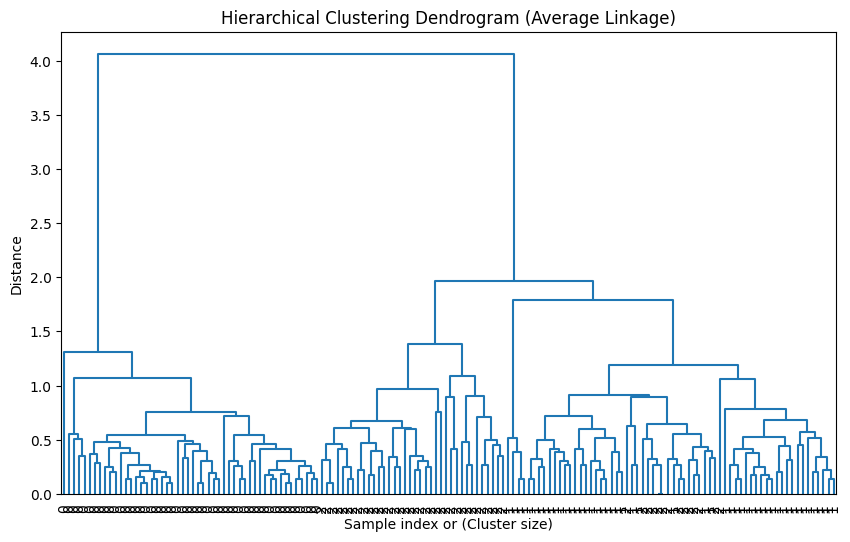

In [11]:
# Import libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Compute hierarchical clustering using average linkage
Z = linkage(X, method='average')

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=iris.target, leaf_rotation=90, leaf_font_size=10, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()


##
### 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

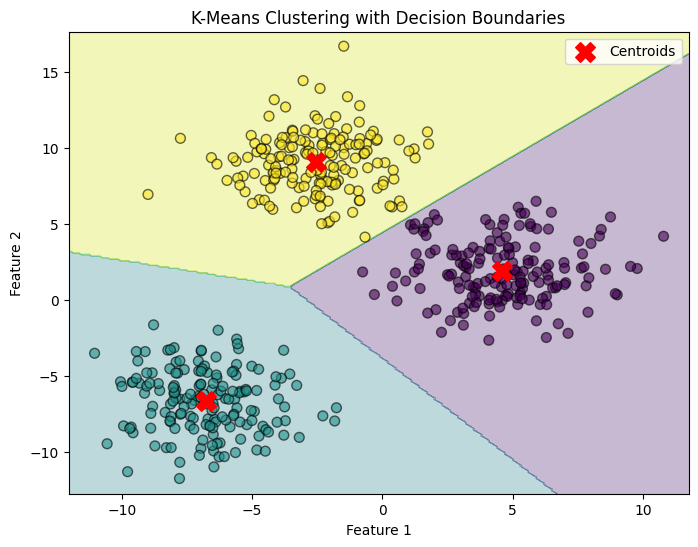

In [12]:

# Step 1: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Create a mesh grid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundaries and clusters
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##
### 32.  Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

C:\Users\Ankit Ghosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


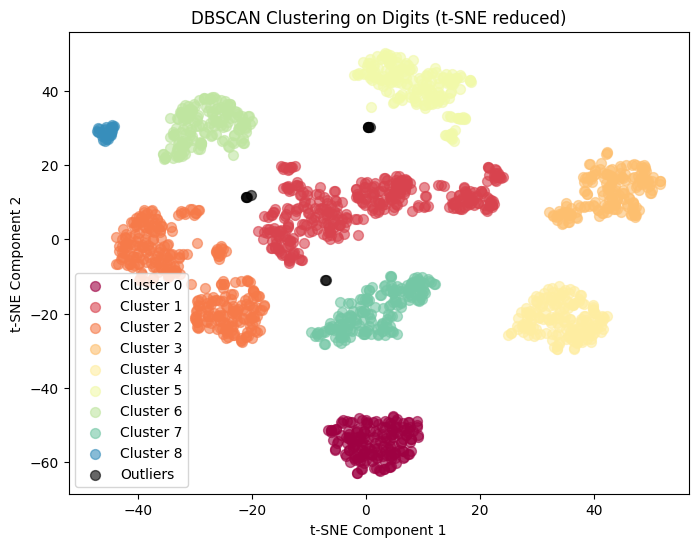

In [14]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
y_db = dbscan.fit_predict(X_tsne)

# Step 4: Visualize clusters
plt.figure(figsize=(8,6))
unique_labels = set(y_db)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for outliers
    class_member_mask = (y_db == k)
    plt.scatter(X_tsne[class_member_mask, 0], X_tsne[class_member_mask, 1],
                c=[col], s=50, alpha=0.6, label=f'Cluster {k}' if k != -1 else 'Outliers')

plt.title('DBSCAN Clustering on Digits (t-SNE reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


##
### 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

##
### 34.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

##
### 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage. 

##
### 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

##
### 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

##
### 38.  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

##
### 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

##
### 40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

##
### 41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

##
### 42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

##
### 43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

##
### 44.  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

##
### 45.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

##
### 46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

##
### 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

##
### 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.